In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
df = pd.read_csv('tweets_clean.csv')

In [9]:
# Convert non-string values in 'text' column to empty strings
df['text'] = df['text'].astype(str)

In [17]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [18]:
# Compute sentiment scores for each submission
sentiment_scores = df['text'].apply(lambda x: sia.polarity_scores(x))

# Add sentiment scores to the DataFrame
df['Negative'] = [score['neg'] for score in sentiment_scores]
df['Neutral'] = [score['neu'] for score in sentiment_scores]
df['Positive'] = [score['pos'] for score in sentiment_scores]
df['Compound'] = [score['compound'] for score in sentiment_scores]

In [19]:
# Classify sentiment based on the compound score
df['Sentiment'] = df['Compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


In [20]:
df

,text,Sentiment,Negative,Neutral,Positive,Compound
0,want wish twitter employees got fired happy ho...,Positive,0.122,0.441,0.437,0.8074
1,curtis415 adamparkhomenko meidastouch elon sno...,Positive,0.193,0.525,0.282,0.6908
2,wkamaubell even made local news tonight one wo...,Negative,0.291,0.709,0.000,-0.6249
3,filed yet another case twitter today twitterla...,Neutral,0.000,1.000,0.000,0.0000
4,new social communication app android ios lets ...,Neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
13223,missed flight yesterday queuing 4h booked tomo...,Negative,0.243,0.600,0.158,-0.4299
13224,bplwijn long queues indications waiting times ...,Negative,0.364,0.578,0.058,-0.8625
13225,schiphol disaster security went strike summer ...,Neutral,0.389,0.226,0.385,-0.0258
13226,need fly schiphol today arrive early allowed 4...,Neutral,0.000,1.000,0.000,0.0000


In [26]:
import matplotlib.pyplot as plt

In [27]:
# Count the number of submissions for each sentiment
sentiment_counts = df['Sentiment'].value_counts()


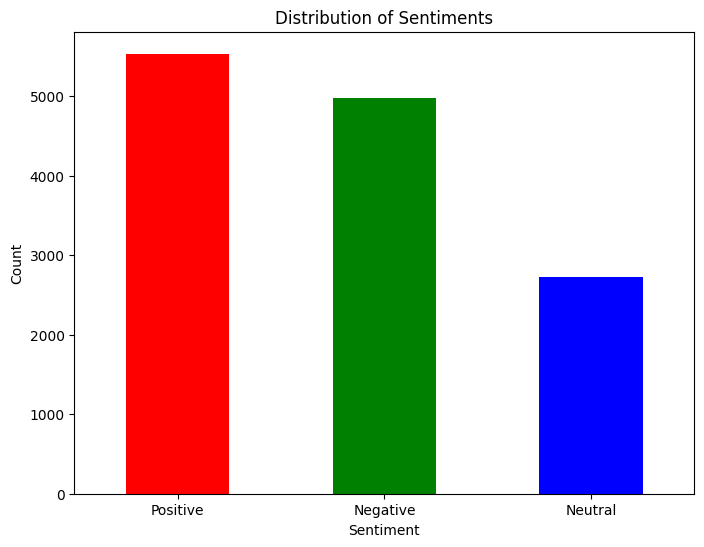

In [28]:
# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

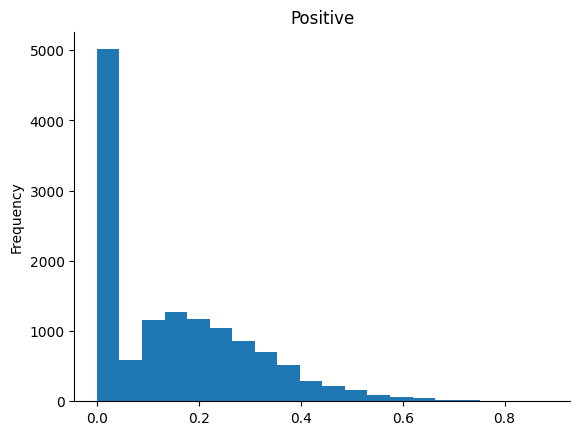

In [21]:
# @title Positive

from matplotlib import pyplot as plt
df['Positive'].plot(kind='hist', bins=20, title='Positive')
plt.gca().spines[['top', 'right',]].set_visible(False)

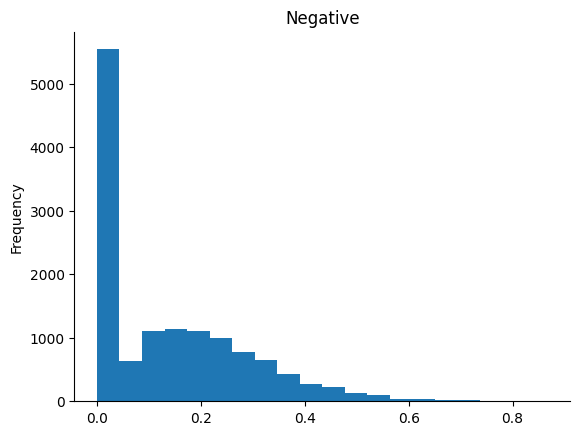

In [22]:
# @title Negative

from matplotlib import pyplot as plt
df['Negative'].plot(kind='hist', bins=20, title='Negative')
plt.gca().spines[['top', 'right',]].set_visible(False)

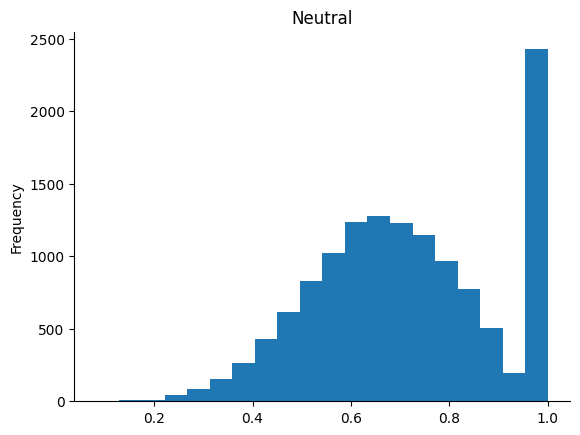

In [24]:
# @title Neutral

from matplotlib import pyplot as plt
df['Neutral'].plot(kind='hist', bins=20, title='Neutral')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

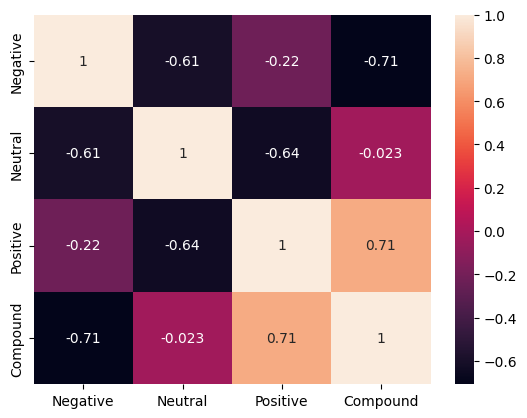

In [25]:
# @title Correlation matrix of sentiment scores

import seaborn as sns
sns.heatmap(df[['Negative', 'Neutral', 'Positive', 'Compound']].corr(), annot=True)